In [38]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import os

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')

numpy: 2.3.2
pandas: 2.3.1
scipy: 1.16.1
scikit-learn: 1.7.1
seaborn: 0.13.2


In [39]:
os.chdir("../data")
print(os.getcwd())

/workspaces/4Geeks_final_project/data


In [40]:
df = pd.read_csv("clean_superstore_dataset.csv", encoding='latin1')

df.head()

,Row_ID,Order_Date,Sales,Turnaround_Time,Customer_Name_encoded,City_encoded,State_encoded,Postal_Code_encoded,Product_ID_encoded,Ship_Mode_first class,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,1,15100992000,261.9600,259200.0,166,193,15,215,12,False,...,False,False,False,False,False,False,False,False,False,False
1,2,15100992000,731.9400,259200.0,166,193,15,215,55,False,...,False,False,False,False,False,False,False,False,False,False
2,3,14972256000,14.6200,345600.0,201,264,3,512,943,False,...,False,False,False,True,False,False,False,False,False,False
3,4,14761440000,957.5775,604800.0,687,152,8,168,319,False,...,False,False,False,False,False,False,False,False,False,True
4,5,14761440000,22.3680,604800.0,687,152,8,168,1313,False,...,False,False,False,False,False,False,False,True,False,False


In [41]:
from sklearn.model_selection import train_test_split

X = df.drop("Sales", axis = 1)
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

In [42]:
X

,Row_ID,Order_Date,Turnaround_Time,Customer_Name_encoded,City_encoded,State_encoded,Postal_Code_encoded,Product_ID_encoded,Ship_Mode_first class,Ship_Mode_same day,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,1,15100992000,259200.0,166,193,15,215,12,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,15100992000,259200.0,166,193,15,215,55,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,14972256000,345600.0,201,264,3,512,943,False,False,...,False,False,False,True,False,False,False,False,False,False
3,4,14761440000,604800.0,687,152,8,168,319,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,14761440000,604800.0,687,152,8,168,1313,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,9796,14953248000,604800.0,663,79,11,343,770,False,False,...,False,False,False,False,False,False,False,False,False,False
9553,9797,14525568000,432000.0,164,482,33,223,514,False,False,...,False,False,False,False,False,False,False,False,False,False
9554,9798,14525568000,432000.0,164,482,33,223,1840,False,False,...,False,False,False,False,False,False,True,False,False,False
9555,9799,14525568000,432000.0,164,482,33,223,1687,False,False,...,False,False,False,False,False,False,True,False,False,False


In [43]:
y

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9552      3.7980
9553     10.3680
9554    235.1880
9555     26.3760
9556     10.3840
Name: Sales, Length: 9557, dtype: float64

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 397.52911912909735
Coefficients (b): [-1.59615614e-03 -9.16738912e-09 -6.09164204e-05  4.54509969e-03
  2.36393583e-02 -1.05559890e-01 -1.06891358e-01  8.36280280e-02
 -8.75661382e+00 -6.21023506e+00  3.08139371e+00  1.18854552e+01
 -1.96226896e+00  1.93244154e+00  2.98274119e-02 -1.38925316e-10
  1.43440047e-01 -2.29436398e+01 -5.99311033e+00  2.87933101e+01
  1.02535595e+02 -1.85815259e+02  8.32796637e+01 -2.30480204e+02
  1.16737923e+02 -3.81137184e+01 -2.03041915e+01  7.77704823e+01
  1.15279770e+02  4.08494480e+02 -3.92782142e+01 -8.90244980e+01
 -2.39839931e+02 -7.16471349e+01  4.40646101e+01 -6.46692006e+01
 -1.38799222e+02  1.06522271e+02 -8.60384959e+01  1.49325274e+02]


In [46]:
y_pred = model.predict(X_test)
y_pred

array([246.88490934, 239.37459883,  60.43791846, ..., 190.89561064,
        49.52116052, 451.74946331], shape=(1912,))

In [47]:
from sklearn.metrics import mean_squared_error as mse , r2_score

print(f"Mean squared error: {mse(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 44351.73158319837
Coefficient of determination: 0.2980733141327524


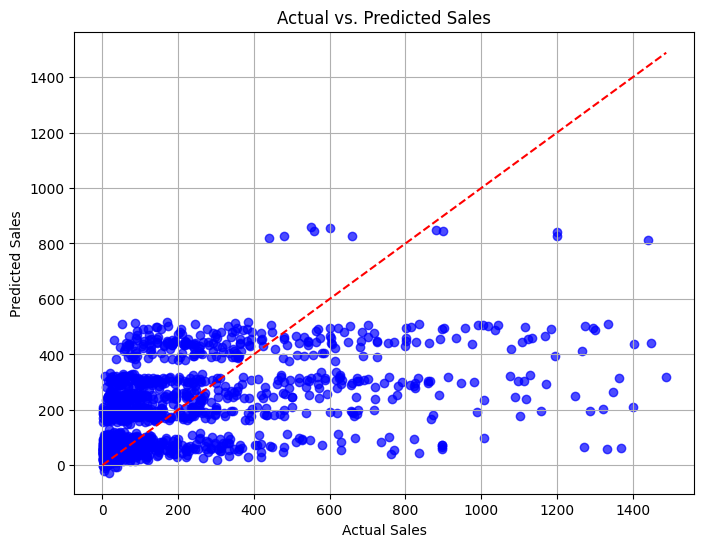

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.grid(True)
plt.show()

In [49]:
residuals = y_test - y_pred

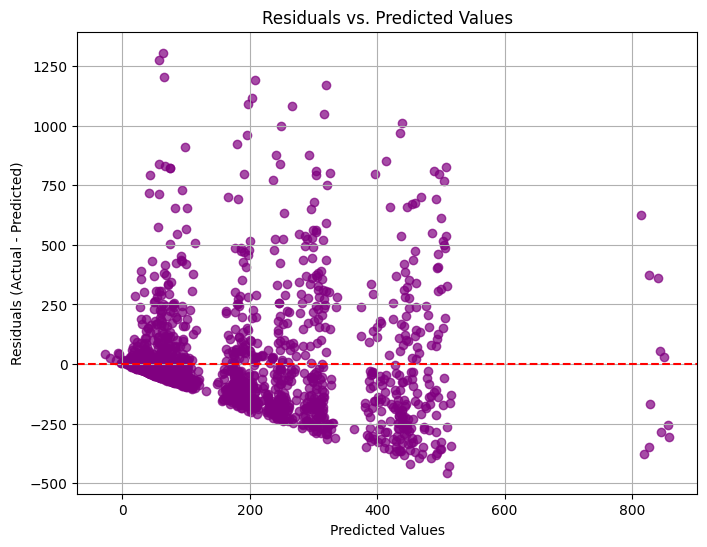

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')  # reference line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()